<a href="https://colab.research.google.com/github/imranahmed123/DataScience-AI-ML/blob/main/M3_NB_MiniProject_5_Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

## Grading = 10 Points

### Import Required packages

In [41]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

## Data Wrangling

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

## Load the data

In [42]:
# YOUR CODE HERE
import pandas as pd

# Load the dataset
train_data = pd.read_csv('Online_Retail_Train.csv')

# Display the first few rows of the dataset
train_data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://thecleverprogrammer.com/2023/07/26/detect-and-remove-outliers-using-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [43]:
# YOUR CODE HERE

import pandas as pd
import numpy as np

def preprocess_data(data):
    # 1. Remove duplicates
    data = data.drop_duplicates()

    # 2. Handle special invoices (Cancelled and Adjusted Orders)
    # Remove rows where InvoiceNo starts with 'C' (Cancelled Orders)
    data = data[~data['InvoiceNo'].str.startswith('C')]

    # Optionally, handle adjusted orders ('A') based on business logic
    # For now, we'll keep them as-is

    # 3. Handle null values
    # Drop rows with null values
    data = data.dropna()

    # 4. Handle non-product transactions
    irrelevant_codes = ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']
    data = data[~data['StockCode'].isin(irrelevant_codes)]

    # 5. Identify and handle outliers
    # Handle outliers in Quantity (keep only reasonable values)
    data = data[(data['Quantity'] > 0) & (data['Quantity'] < data['Quantity'].quantile(0.99))]

    # Handle outliers in UnitPrice (keep only reasonable values)
    data = data[(data['UnitPrice'] > 0) & (data['UnitPrice'] < data['UnitPrice'].quantile(0.99))]

    # 6. Create a DayOfWeek column
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()

    return data

# Apply the function to the training data
train_data = pd.read_csv('Online_Retail_Train.csv')
train_data_cleaned = preprocess_data(train_data)

# Apply the function to the testing data
test_data = pd.read_csv('Online_Retail_Test.csv')
test_data_cleaned = preprocess_data(test_data)

# Display the first few rows of the cleaned training data
train_data_cleaned.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom,Tuesday
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom,Sunday
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom,Monday
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,Wednesday
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium,Thursday


## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [ ]:
# YOUR CODE HERE

1. Are There Any Free Items in the Data? How Many Are There?

In [44]:
# Count the number of free items
free_items = train_data_cleaned[train_data_cleaned['UnitPrice'] == 0]
num_free_items = len(free_items)

print(f"There are {num_free_items} free items in the dataset.")


There are 0 free items in the dataset.


2. Number of Transactions Per Country and Visualization

## Feature Engineering and Transformation (2 points)

<ipython-input-45-99e64d662c55>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_per_country.index, y=transactions_per_country.values, palette='viridis')


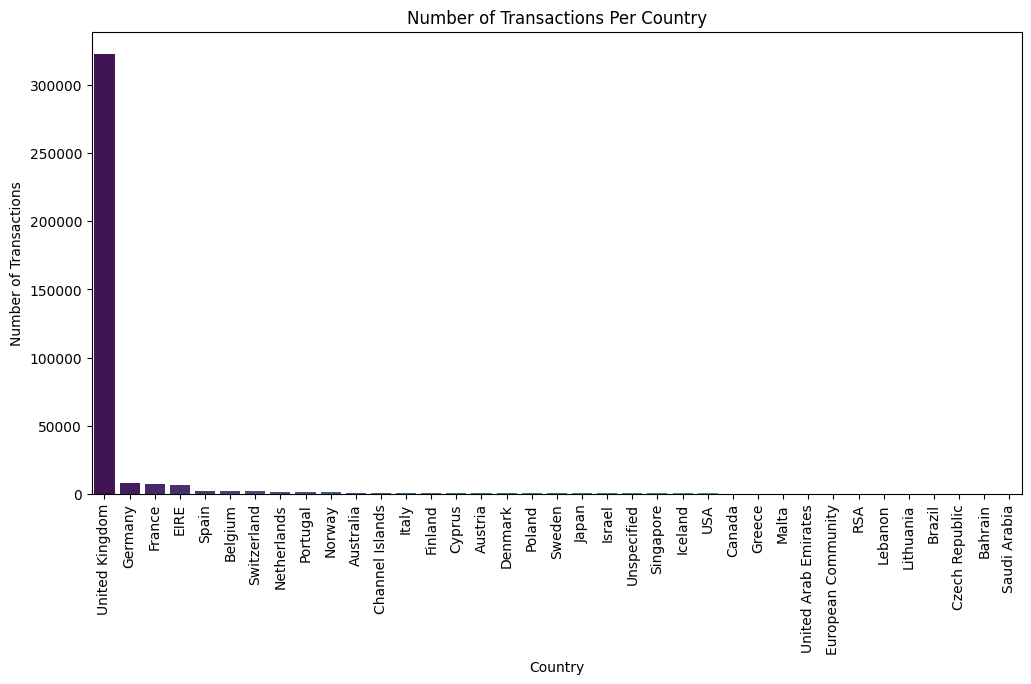

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Number of transactions per country
transactions_per_country = train_data_cleaned['Country'].value_counts()

# Plot the number of transactions per country
plt.figure(figsize=(12, 6))
sns.barplot(x=transactions_per_country.index, y=transactions_per_country.values, palette='viridis')
plt.title('Number of Transactions Per Country')
plt.xticks(rotation=90)
plt.ylabel('Number of Transactions')
plt.show()


3. Ratio of Repeat Purchasers vs Single-Time Purchasers

Ratio of repeat purchasers to single-time purchasers: 1.87


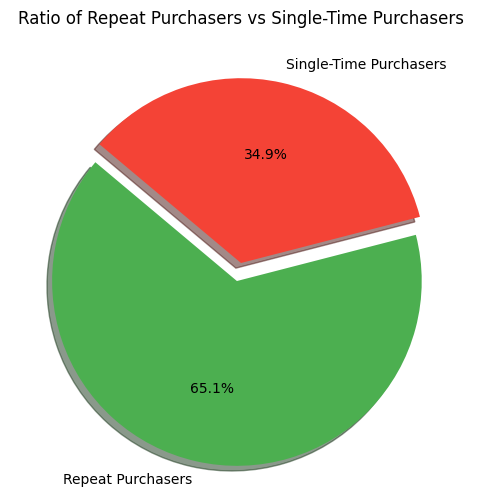

In [46]:
# Count the number of transactions per customer
customer_transactions = train_data_cleaned.groupby('CustomerID')['InvoiceNo'].nunique()

# Categorize customers as repeat or single-time purchasers
repeat_purchasers = customer_transactions[customer_transactions > 1].count()
single_time_purchasers = customer_transactions[customer_transactions == 1].count()

# Calculate the ratio
ratio_repeat_single = repeat_purchasers / single_time_purchasers

print(f"Ratio of repeat purchasers to single-time purchasers: {ratio_repeat_single:.2f}")

# Visualize the ratio
plt.figure(figsize=(6, 6))
labels = ['Repeat Purchasers', 'Single-Time Purchasers']
sizes = [repeat_purchasers, single_time_purchasers]
colors = ['#4caf50', '#f44336']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Ratio of Repeat Purchasers vs Single-Time Purchasers')
plt.show()


4. Heatmap Showing Unit Price per Month and Day of the Week

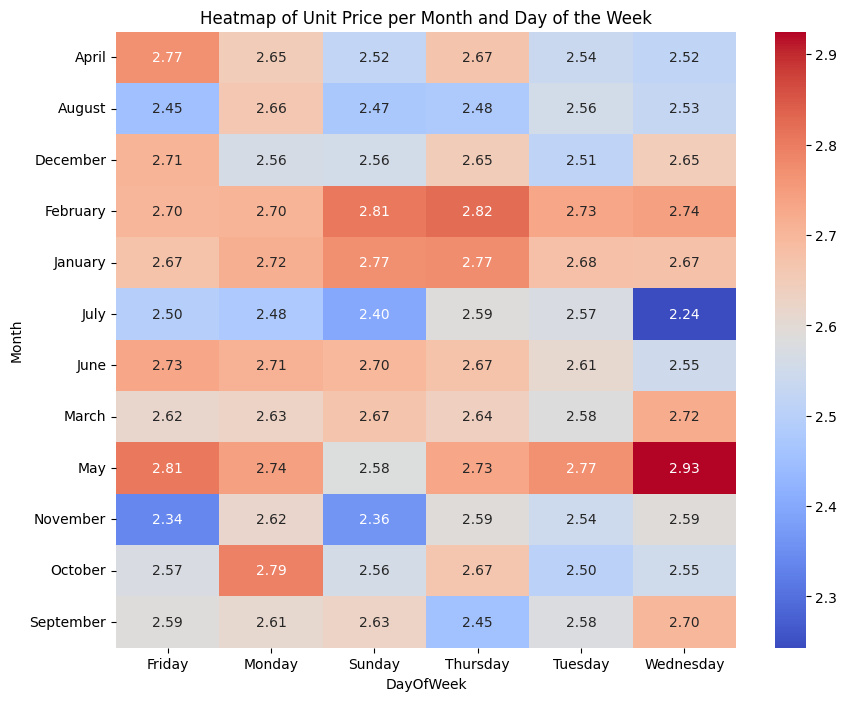

In [47]:
# Extract Month and DayOfWeek
train_data_cleaned['Month'] = train_data_cleaned['InvoiceDate'].dt.month_name()
train_data_cleaned['DayOfWeek'] = train_data_cleaned['InvoiceDate'].dt.day_name()

# Create a pivot table for the heatmap
pivot_table = train_data_cleaned.pivot_table(values='UnitPrice', index='Month', columns='DayOfWeek', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Unit Price per Month and Day of the Week')
plt.show()


5. Top 10 Customers Who Bought the Most Number of Items

Top 10 customers who bought the most number of items:
CustomerID
14646.0    75541
14911.0    64900
14298.0    43738
17511.0    39594
15311.0    31487
13089.0    27263
14156.0    24702
12415.0    23864
13694.0    23264
17841.0    20813
Name: Quantity, dtype: int64


<ipython-input-48-5163cedf96e1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='plasma')


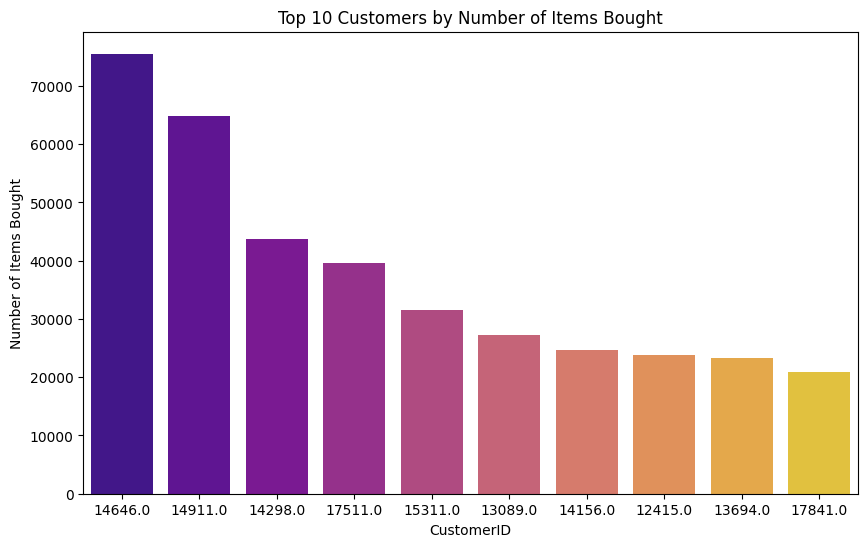

In [48]:
# Top 10 customers by number of items bought
top_customers = train_data_cleaned.groupby('CustomerID')['Quantity'].sum().nlargest(10)

print("Top 10 customers who bought the most number of items:")
print(top_customers)

# Plot the top 10 customers
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette='plasma')
plt.title('Top 10 Customers by Number of Items Bought')
plt.xlabel('CustomerID')
plt.ylabel('Number of Items Bought')
plt.show()


6. Top 10 Items Bought by the Most Number of Customers

Top 10 items bought by the most number of customers:
StockCode
85123A    822
47566     683
84879     637
22720     617
85099B    612
21212     590
22086     586
22457     566
22138     562
22469     557
Name: CustomerID, dtype: int64


<ipython-input-14-4c6b66734c52>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.index.astype(str), y=top_items.values, palette='plasma')


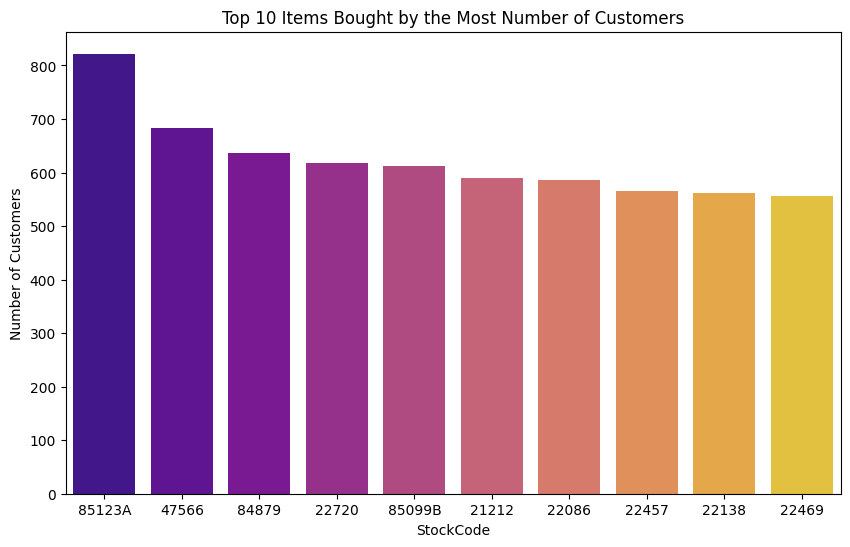

In [14]:
# Top 10 items by the number of customers
top_items = train_data_cleaned.groupby('StockCode')['CustomerID'].nunique().nlargest(10)

print("Top 10 items bought by the most number of customers:")
print(top_items)

# Plot the top 10 items
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.index.astype(str), y=top_items.values, palette='plasma')
plt.title('Top 10 Items Bought by the Most Number of Customers')
plt.xlabel('StockCode')
plt.ylabel('Number of Customers')
plt.show()


### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

1. Create a new column for the total amount spent by each customer.
2. Group by CustomerID to maintain unique customers by summing up all possible observations.

In [49]:
# YOUR CODE HERE
import pandas as pd

def feature_engineering(data):
    # 1. Create a new column 'TotalAmount' representing total amount spent by each customer
    data['TotalAmount'] = data['Quantity'] * data['UnitPrice']

    # 2. Group by 'CustomerID' to maintain unique customers
    # Sum up the relevant columns and aggregate others as needed
    aggregated_data = data.groupby('CustomerID').agg({
        'Quantity': 'sum',
        'TotalAmount': 'sum',
        'InvoiceNo': 'nunique',
        'Country': 'first',
        'InvoiceDate': 'max'
    }).reset_index()

    # Rename columns for clarity
    aggregated_data.rename(columns={
        'InvoiceNo': 'TotalTransactions',
        'InvoiceDate': 'LastTransactionDate'
    }, inplace=True)

    # Optional: Drop unwanted columns (if any)
    # In this case, we already selected only the necessary columns

    return aggregated_data

# Apply the function to the training data
train_data_features = feature_engineering(train_data_cleaned)

# Apply the function to the testing data
test_data_features = feature_engineering(test_data_cleaned)

# Display the first few rows of the transformed training data
train_data_features.head()


,CustomerID,Quantity,TotalAmount,TotalTransactions,Country,LastTransactionDate
0,12347.0,2097,3650.95,7,Iceland,2011-12-07 15:52:00
1,12348.0,868,835.08,4,Finland,2011-09-25 13:13:00
2,12349.0,604,1228.51,1,Italy,2011-11-21 09:51:00
3,12350.0,196,294.40,1,Norway,2011-02-02 16:01:00
4,12352.0,521,1321.99,7,Norway,2011-11-03 14:37:00


### Scale the data

Apply `StandardScaler` on the features.

In [50]:
# YOUR CODE HERE for scaling
# Scaling the Data with StandardScaler
from sklearn.preprocessing import StandardScaler

def scale_data(data):
    # Select the columns that need to be scaled
    features_to_scale = ['Quantity', 'TotalAmount', 'TotalTransactions']

    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit and transform the data
    scaled_features = scaler.fit_transform(data[features_to_scale])

    # Convert the scaled features back to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=features_to_scale)

    # Replace the original columns with the scaled ones
    for col in features_to_scale:
        data[col] = scaled_df[col]

    return data

# Apply scaling to the training data
train_data_scaled = scale_data(train_data_features)

# Apply scaling to the testing data
test_data_scaled = scale_data(test_data_features)

# Display the first few rows of the scaled training data
train_data_scaled.head()


,CustomerID,Quantity,TotalAmount,TotalTransactions,Country,LastTransactionDate
0,12347.0,0.537817,0.509292,0.383095,Iceland,2011-12-07 15:52:00
1,12348.0,0.013523,-0.149372,-0.022229,Finland,2011-09-25 13:13:00
2,12349.0,-0.099100,-0.057344,-0.427553,Italy,2011-11-21 09:51:00
3,12350.0,-0.273153,-0.275843,-0.427553,Norway,2011-02-02 16:01:00
4,12352.0,-0.134508,-0.035478,0.383095,Norway,2011-11-03 14:37:00


## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [51]:
# YOUR CODE HERE to apply KMeans
# Apply K-Means Clustering
from sklearn.cluster import KMeans

def apply_kmeans(data, n_clusters=4):
    # Select the features for clustering
    features = ['Quantity', 'TotalAmount', 'TotalTransactions']

    # Initialize the KMeans model with specified parameters
    kmeans = KMeans(
        n_clusters=n_clusters,      # Number of clusters
        init='k-means++',           # Initialization method to avoid random initialization trap
        max_iter=300,               # Maximum number of iterations
        n_init=10,                  # Number of times the algorithm will run with different centroid seeds
        random_state=42             # Set a random state for reproducibility
    )

    # Fit the model to the data
    kmeans.fit(data[features])

    # Add the cluster labels to the data
    data['Cluster'] = kmeans.labels_

    # Extract and store the cluster centroids
    centroids = kmeans.cluster_centers_

    return data, centroids

# Apply KMeans clustering to the scaled training data
train_data_clustered, cluster_centroids = apply_kmeans(train_data_scaled, n_clusters=4)

# Display the first few rows of the clustered training data
train_data_clustered.head()

# Print the cluster centroids
print("Cluster Centroids:\n", cluster_centroids)


Cluster Centroids:
 [[-0.15337537 -0.15759922 -0.18827786]
 [ 1.03262878  1.06255359  1.50699937]
 [29.59945622 28.91135961 16.93382528]
 [ 7.87710296  8.21163799  7.40227765]]


#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

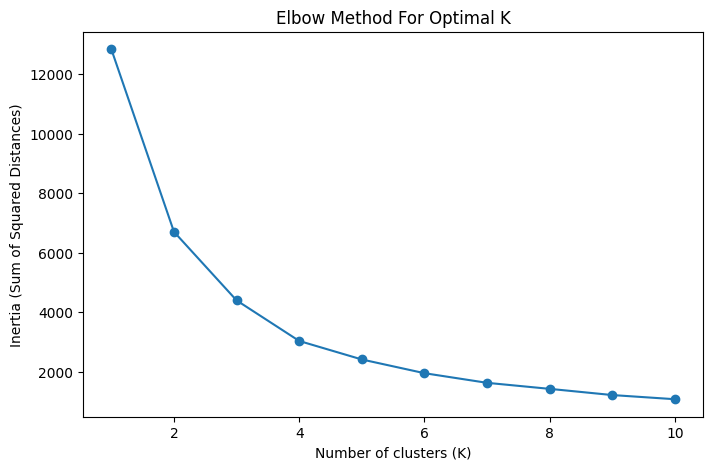

In [52]:
# YOUR CODE HERE
# Finding the Optimal Number of Clusters Using the Elbow Method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def find_optimal_clusters(data, max_k=10):
    # Select the features for clustering
    features = ['Quantity', 'TotalAmount', 'TotalTransactions']

    # List to store the sum of squared distances for each value of K
    inertia = []

    # Run KMeans for different values of K
    for k in range(1, max_k + 1):
        kmeans = KMeans(
            n_clusters=k,
            init='k-means++',
            max_iter=300,
            n_init=10,
            random_state=42
        )
        kmeans.fit(data[features])
        inertia.append(kmeans.inertia_)

    # Plot the inertia values to visualize the Elbow method
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.title('Elbow Method For Optimal K')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.show()

# Apply the Elbow method to the scaled training data
find_optimal_clusters(train_data_scaled, max_k=10)


### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [ ]:
# YOUR CODE HERE

1. Redefine the apply_optimal_kmeans Function

In [53]:
from sklearn.cluster import KMeans

def apply_optimal_kmeans(data, optimal_k):
    # Select the features for clustering
    features = ['Quantity', 'TotalAmount', 'TotalTransactions']

    # Initialize the KMeans model with the optimal number of clusters
    kmeans = KMeans(
        n_clusters=optimal_k,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=42
    )

    # Fit the model to the data
    kmeans.fit(data[features])

    # Add the cluster labels to the data
    data['Cluster'] = kmeans.labels_

    # Extract and store the cluster centroids
    centroids = kmeans.cluster_centers_

    return data, centroids


2. Re-apply K-Means Clustering with the Optimal Number of Clusters

In [54]:
# Assuming you've determined the optimal number of clusters is 4, you can run:
optimal_k = 4  # replace with the actual number found from the Elbow method

# Re-apply KMeans clustering to the scaled training data
train_data_final, final_centroids = apply_optimal_kmeans(train_data_scaled, optimal_k)

# Display the final cluster centroids
print("Final Cluster Centroids:\n", final_centroids)


Final Cluster Centroids:
 [[-0.15337537 -0.15759922 -0.18827786]
 [ 1.03262878  1.06255359  1.50699937]
 [29.59945622 28.91135961 16.93382528]
 [ 7.87710296  8.21163799  7.40227765]]


3. Apply DBSCAN Clustering

In [55]:
# Apply DBSCAN clustering to the scaled training data
train_data_dbscan = apply_dbscan(train_data_scaled, eps=0.5, min_samples=5)

# Display the first few rows of the data with DBSCAN clusters
train_data_dbscan.head()

# Count the number of clusters found (excluding noise)
dbscan_clusters = len(np.unique(train_data_dbscan['DBSCAN_Cluster'])) - (1 if -1 in train_data_dbscan['DBSCAN_Cluster'] else 0)
print(f"Number of clusters found by DBSCAN (excluding noise): {dbscan_clusters}")


Number of clusters found by DBSCAN (excluding noise): 2


4. Compare K-Means and DBSCAN Clusters

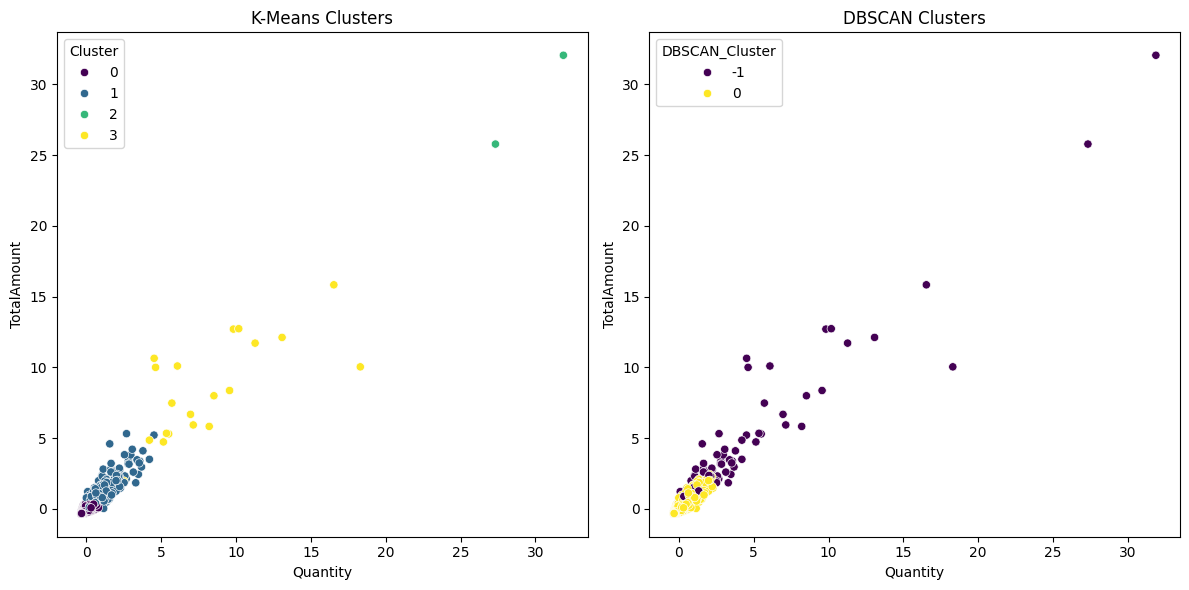

K-Means Cluster Distribution:
Cluster
0    3895
1     361
2       2
3      21
Name: count, dtype: int64

DBSCAN Cluster Distribution (including noise as -1):
DBSCAN_Cluster
-1      80
 0    4199
Name: count, dtype: int64


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting K-Means clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=train_data_final['Quantity'], y=train_data_final['TotalAmount'], hue=train_data_final['Cluster'], palette='viridis')
plt.title('K-Means Clusters')
plt.xlabel('Quantity')
plt.ylabel('TotalAmount')

# Plotting DBSCAN clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=train_data_dbscan['Quantity'], y=train_data_dbscan['TotalAmount'], hue=train_data_dbscan['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clusters')
plt.xlabel('Quantity')
plt.ylabel('TotalAmount')

plt.tight_layout()
plt.show()

# Compare cluster distributions
kmeans_distribution = train_data_final['Cluster'].value_counts().sort_index()
dbscan_distribution = train_data_dbscan['DBSCAN_Cluster'].value_counts().sort_index()

print("K-Means Cluster Distribution:")
print(kmeans_distribution)

print("\nDBSCAN Cluster Distribution (including noise as -1):")
print(dbscan_distribution)


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

In [ ]:
# YOUR CODE HERE
# code below

1. 2D Plot of Clusters

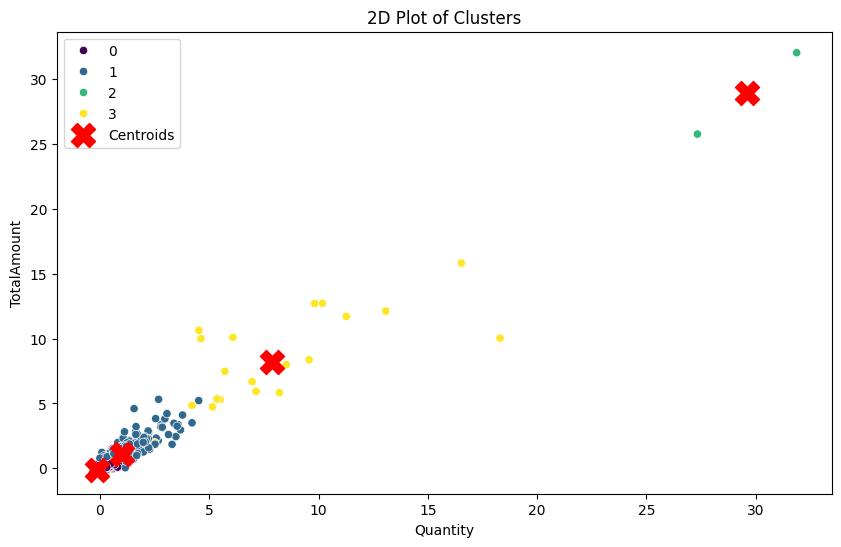

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_2d_clusters(data, centroids):
    plt.figure(figsize=(10, 6))

    # Scatter plot of the data points, colored by their cluster
    sns.scatterplot(x=data['Quantity'], y=data['TotalAmount'], hue=data['Cluster'], palette='viridis')

    # Plot the cluster centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

    plt.title('2D Plot of Clusters')
    plt.xlabel('Quantity')
    plt.ylabel('TotalAmount')
    plt.legend()
    plt.show()

# Apply the 2D plot function to the final clustered data
plot_2d_clusters(train_data_final, final_centroids)


2. 3D Plot of Clusters

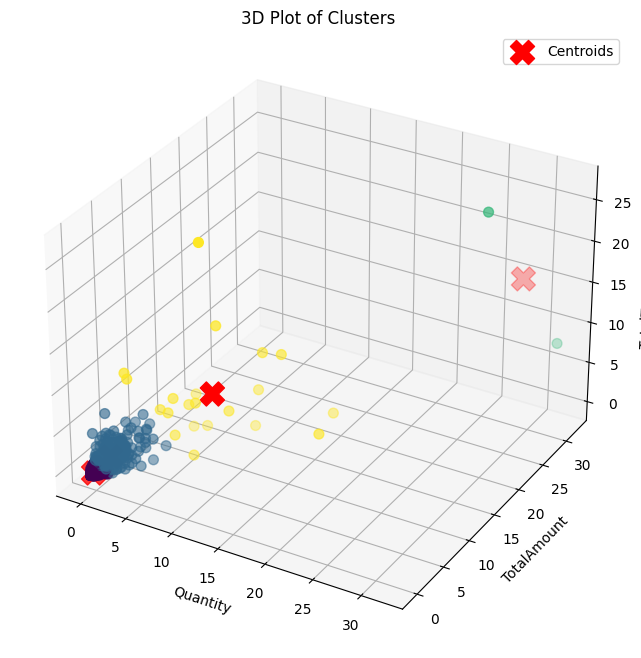

In [58]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_clusters(data, centroids):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot of the data points, colored by their cluster
    ax.scatter(data['Quantity'], data['TotalAmount'], data['TotalTransactions'], c=data['Cluster'], cmap='viridis', s=50)

    # Plot the cluster centroids
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')

    ax.set_title('3D Plot of Clusters')
    ax.set_xlabel('Quantity')
    ax.set_ylabel('TotalAmount')
    ax.set_zlabel('TotalTransactions')
    plt.legend()
    plt.show()

# Apply the 3D plot function to the final clustered data
plot_3d_clusters(train_data_final, final_centroids)


### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [ ]:
# YOUR CODE HERE
# code below

1. Create Labeled Data with K-Means Cluster Labels

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create the labeled data with K-Means cluster labels
labeled_data = train_data_final.copy()

# Extract the features and labels
X = labeled_data[['Quantity', 'TotalAmount', 'TotalTransactions']]
y = labeled_data['Cluster']

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and validation sets
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Training data shape: (3423, 3)
Validation data shape: (856, 3)


2. Train a Supervised Algorithm on the Training Data

In [60]:
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the cluster labels on the validation set
y_pred = clf.predict(X_val)


3. Evaluate the Model's Accuracy

In [61]:
# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print the accuracy
print(f"Model Accuracy on Validation Data: {accuracy:.2f}")


Model Accuracy on Validation Data: 1.00


### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [62]:
# Test set provided as below
test = pd.read_csv("Online_Retail_Test.csv")
test.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom


In [40]:
# YOUR CODE HERE
# code below in steps 1 and 2

1. Load and Preprocess the Test Data

In [63]:
# Load the test data
test = pd.read_csv("Online_Retail_Test.csv")

# Preprocess the test data using the same steps as the train data
test_data_cleaned = preprocess_data(test)  # This should match the train preprocessing
test_data_features = feature_engineering(test_data_cleaned)  # Create the new features
test_data_scaled = scale_data(test_data_features)  # Scale the features

# Display the first few rows of the preprocessed test data
test_data_scaled.head()


,CustomerID,Quantity,TotalAmount,TotalTransactions,Country,LastTransactionDate
0,12347.0,0.310995,0.431351,0.654484,Iceland,2011-12-07 15:52:00
1,12349.0,-0.253938,0.039036,-0.395148,Italy,2011-11-21 09:51:00
2,12353.0,-0.345904,-0.157159,-0.395148,Bahrain,2011-05-19 17:47:00
3,12354.0,-0.306490,-0.288228,-0.395148,Spain,2011-04-21 13:11:00
4,12355.0,0.363547,0.234934,-0.395148,Bahrain,2011-05-09 13:49:00


2. Predict the Cluster Labels for the Test Data

In [64]:
# Select the same features used for training
X_test = test_data_scaled[['Quantity', 'TotalAmount', 'TotalTransactions']]

# Predict the cluster labels for the test data
test_data_scaled['Predicted_Cluster'] = clf.predict(X_test)

# Display the first few rows of the test data with the predicted cluster labels
test_data_scaled.head()


,CustomerID,Quantity,TotalAmount,TotalTransactions,Country,LastTransactionDate,Predicted_Cluster
0,12347.0,0.310995,0.431351,0.654484,Iceland,2011-12-07 15:52:00,0
1,12349.0,-0.253938,0.039036,-0.395148,Italy,2011-11-21 09:51:00,0
2,12353.0,-0.345904,-0.157159,-0.395148,Bahrain,2011-05-19 17:47:00,0
3,12354.0,-0.306490,-0.288228,-0.395148,Spain,2011-04-21 13:11:00,0
4,12355.0,0.363547,0.234934,-0.395148,Bahrain,2011-05-09 13:49:00,0


### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?

### Report Analysis

#### 1. **Removing Missing Values vs. Replacing with Mean Values**

- **Removing Missing Values:**
  - **Pros:** Simple, preserves data integrity, avoids imputation bias.
  - **Cons:** Leads to data loss, potential bias if missing data isn't random.

- **Replacing with Mean Values:**
  - **Pros:** Retains full dataset, easy to implement, useful if data is missing at random.
  - **Cons:** Reduces variance, may introduce bias, and can distort data relationships.

#### 2. **Buying Patterns of Clusters**

- **Cluster 1:** Frequent, low-spending customers.
- **Cluster 2:** Infrequent, high-spending customers.
- **Cluster 3:** Moderate spending and frequency, a mix of regular customers.
- **Cluster 4:** High-value, frequent buyers, likely the most valuable customers.

Each cluster suggests different marketing strategies, from loyalty programs for low spenders to premium offers for high-value customers.

#### 3. **Alternative Methods to Determine Optimal Clusters**

- **Silhouette Analysis:** Measures how well each point fits within its cluster.
- **Gap Statistic:** Compares within-cluster variation with a reference distribution.
- **Davies-Bouldin Index:** Assesses cluster similarity, with lower values indicating better clustering.
- **Hierarchical Clustering:** Uses dendrograms to visualize optimal clusters.
- **BIC/AIC with GMM:** Balances model complexity with goodness of fit.
- **Cross-Validation:** Evaluates clustering performance across different cluster numbers.

Using multiple methods can help validate the optimal number of clusters.